Testing processes (see below, in order) on new images provided by Rachel to check performance in different enviornments than what was trained on.

(1) Image Segmentation (current method: watershed)
(2) Image Measurement (Current: skimage.measure
(3) Model Classification (current: Random Forest [i] C & MC vs I & P, [ii] C vs MC

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stat
import numpy as np 
#import forestsci
import model_utility
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter
import pickle
import glob

from Rachel_Work.segmentation_utils_v3 import * # Note: Import depends on where your file is

image_folder = "Rachel_Work/Test_Images" # Path to folder, adjust for other machines
image_list_Si = glob.glob(f'{image_folder}/Si embed/*')
image_list_Yuanwei = glob.glob(f'{image_folder}/Images to rachel (from Yuanwei)/*/*')



In [2]:
print(image_list_Si)
print(image_list_Yuanwei)

['Rachel_Work/Test_Images/Si embed/2_01.tif', 'Rachel_Work/Test_Images/Si embed/2_02.tif', 'Rachel_Work/Test_Images/Si embed/2_04.tif', 'Rachel_Work/Test_Images/Si embed/2_08.tif', 'Rachel_Work/Test_Images/Si embed/4_01.tif', 'Rachel_Work/Test_Images/Si embed/5_01.tif', 'Rachel_Work/Test_Images/Si embed/5_02.tif', 'Rachel_Work/Test_Images/Si embed/5_06.tif', 'Rachel_Work/Test_Images/Si embed/5_09.tif']
['Rachel_Work/Test_Images/Images to rachel (from Yuanwei)/cube/1.tif', 'Rachel_Work/Test_Images/Images to rachel (from Yuanwei)/cube/10.tif', 'Rachel_Work/Test_Images/Images to rachel (from Yuanwei)/cube/11.tif', 'Rachel_Work/Test_Images/Images to rachel (from Yuanwei)/cube/12.tif', 'Rachel_Work/Test_Images/Images to rachel (from Yuanwei)/cube/13.tif', 'Rachel_Work/Test_Images/Images to rachel (from Yuanwei)/cube/14.tif', 'Rachel_Work/Test_Images/Images to rachel (from Yuanwei)/cube/15.tif', 'Rachel_Work/Test_Images/Images to rachel (from Yuanwei)/cube/16.tif', 'Rachel_Work/Test_Images/I

Image Segmenter on 12 created!


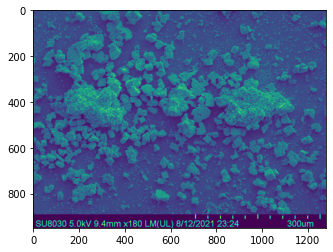

In [21]:
IS = ImageSegmenter(image_list_Yuanwei[3])
plt.imshow(IS.img2)

array([ -1,   0,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 18

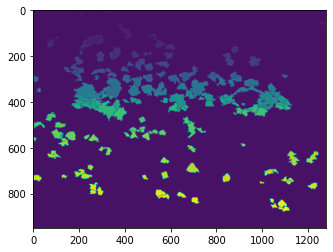

In [22]:
import matplotlib.pyplot as plt
plt.imshow(IS.markers)
np.unique(IS.markers)

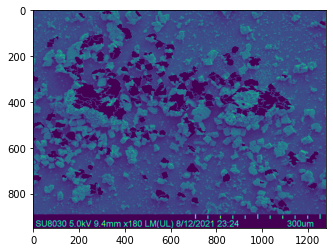

In [23]:
# Quick check so one can see what region was "forgotten" by image segmenter
img_forgotten = copy.deepcopy(IS.img2)
img_forgotten[IS.markers > 10] = 0
plt.imshow(img_forgotten)

In [17]:
# load first RF model from disk
model_name = "RF_C-MC_I-P.sav"
loaded_model = pickle.load(open(model_name, 'rb'))


In [18]:
# Prepare data
features=['area',
#        'equivalent_diameter', 
#        'orientation', 
    'major_axis_length',
    'minor_axis_length',
    'perimeter',
        'min_intensity',
        'mean_intensity',
        'max_intensity',
    'solidity',
    'major_axis_length/minor_axis_length',
    'perimeter/major_axis_length',
    'perimeter/minor_axis_length',
          'feret_diameter_max',
      'moments_hu-0',
      'moments_hu-1',
      'moments_hu-2',
#      'moments_hu-3',
#      'moments_hu-4',
#      'moments_hu-5',
#      'moments_hu-6',
#    'eccentricity'
         ]

df = IS.df
#print(np.unique(df["Filename"]))

# Modify Data (Remove illegal data OR set different runtime)

# Numerical errors (divide by 0)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
for feature in features:
    df.dropna(subset=[feature],inplace=True)

# Split Data (TO-DO)
X=df[features]

# Make adjustments to data
X=X # For RF, feature normalization NOT NEEDED

# NOTE (2022.08.24): What do I have to do with the classification afterwards???

#y
#ohe = OneHotEncoder(sparse=False)
#y = ohe.fit_transform(df[[label]])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

[  1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  17  18  19
  20  21  22  23  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175]


In [19]:
predicted_data = loaded_model.predict(X)

def assign_label(predicted_data):
    '''
    Given an array of arrays, get the max column, associate that with a name, and return the fully labeled list
    '''
    label_arr = []
    for data in predicted_data:
        index = np.argmax(data)
        if index == 0:
            label_arr.append("Crystal")
        if index == 1:
            label_arr.append("Incomplete")
    return label_arr
        
labeled_arr = assign_label(predicted_data)
IS.df['Labels'] = labeled_arr
IS.override_exists=True
IS.create_csv()
print(IS._csv_file)

Results/values_1.csv


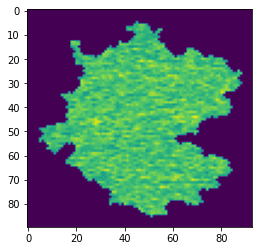

Model Thinks: Incomplete


KeyboardInterrupt: Interrupted by user

In [20]:

for ii in np.arange(len(IS.region_arr)):
    clear_output(wait=False)
    plt.imshow(IS.region_arr[ii])
    plt.show()
    print(f'Model Thinks: {labeled_arr[ii]}')
    input('Next (hit enter)')
